<a href="https://colab.research.google.com/github/hyeonjusong410/DL.Basic/blob/main/dot_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Colab Notebooks/DL_Basic/

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipython-input-771302750.py", line 1, in <cell line: 0>
    get_ipython().run_line_magic('cd', '/content/gdrive/MyDrive/Colab Notebooks/DL_Basic/')
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 2418, in run_line_magic
    result = fn(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^
  File "<decorator-gen-85>", line 2, in cd
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
                              ^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/magics/osm.py", line 342, in cd
    oldcwd = os.getcwd()
             ^^^^^^^^^^^
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another

In [ ]:
%ls

dot_classification.ipynb  Universal_Approximator.ipynb
__pycache__/              실습_4_CNN_with_Pytorch.ipynb
toydata.py


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import toydata

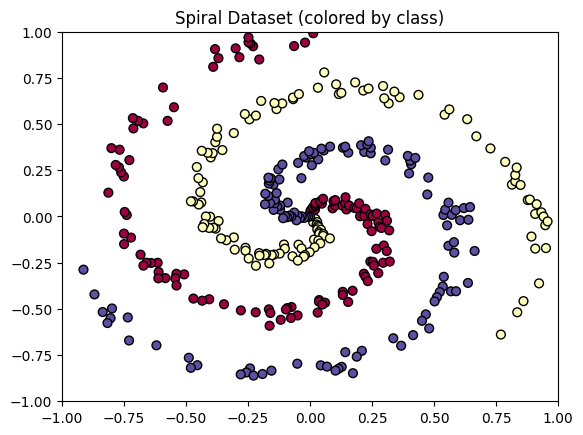

In [ ]:
num_tendril = 3

data = toydata.ToyData(num_classes=num_tendril)

xtrain, ytrain, xtest, ytest = data.load_data()

fig, ax = data.plot_spiraldata()

In [ ]:
print(type(xtrain))
print(type(ytrain))

print(f"xtrain: {xtrain} \n")
print(f"ytrain: {ytrain}")

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
xtrain: [[ 5.39165497e-01 -3.26371342e-01]
 [ 1.24019971e-02 -3.12418658e-02]
 [-1.80551052e-01  1.23036824e-01]
 [-2.60575116e-01 -1.69630691e-01]
 [-6.44717142e-02  9.22118664e-01]
 [-4.80805397e-01 -8.18857789e-01]
 [ 1.30162448e-01  5.88719100e-02]
 [ 2.30593786e-01  3.90824974e-01]
 [-5.93092561e-01  6.98022664e-01]
 [-2.52573770e-02 -2.17022598e-01]
 [-2.03921601e-01 -2.11946145e-01]
 [-7.50975430e-01  2.16328144e-01]
 [ 1.44452406e-02 -8.59074853e-03]
 [-4.42921430e-01  1.32043377e-01]
 [ 9.41176355e-01 -5.10170474e-04]
 [-7.61825085e-01  2.38613278e-01]
 [ 2.89710332e-02 -3.04317474e-02]
 [ 8.27074528e-01  1.90542504e-01]
 [-7.35121965e-01 -5.46433985e-01]
 [-5.02127074e-02  4.56916494e-03]
 [ 5.36079779e-02 -9.51859802e-02]
 [-4.35374469e-01 -4.55704719e-01]
 [-6.11936629e-01 -3.34679723e-01]
 [-7.14466333e-01  5.31963050e-01]
 [-3.80945474e-01 -6.56126216e-02]
 [-1.43711954e-01  6.13648593e-01]
 [ 2.14529708e-02 -1.32407835e-02]



```
# 코드로 형식 지정됨
```

### Model definition


In [ ]:
import torch.nn.functional as F

x = torch.randn(10, 5, requires_grad=True)

output = F.relu(x)

In [ ]:
class Model(torch.nn.Module):
  def initialize_params(self, N, num_classes: int):
    self.w = nn.Parameter(torch.empty(2, N))
    self.b = nn.Parameter(torch.zeros(1, N))
    self.v = nn.Parameter(torch.empty(N, num_classes))

    nn.init.kaiming_normal_(self.w, mode='fan_in', nonlinearity='relu')
    nn.init.kaiming_normal_(self.v, mode='fan_in', nonlinearity='relu')

  def __init__(self, num_neurons, num_classes):
    super(Model, self).__init__()
    self.initialize_params(num_neurons, num_classes)

  def forward(self, x):
    out1 = F.relu(x @ self.w + self.b)
    return out1 @ self.v

  @property
  def model_parameters(self):
    return (self.w, self.b, self.v)

  def load_parameters(self, w, b, v):
    self.w = torch.nn.Parameter(w)
    self.b = torch.nn.Parameter(b)
    self.v = torch.nn.Parameter(v)

### Loss fuction

In [ ]:
#ex
predictions = torch.randn(10, 3, requires_grad=True)
labels = torch.randint(0, 3, (10,))

loss = F.cross_entropy(predictions, labels)

### Gradient desent

In [ ]:
def grad_decent(params, learning_rate):
  for p in params:
    if p.grad is not None:
      p.data -= learning_rate * p.grad

### Accuracy

In [ ]:
def accuracy(predictions, truth):
  predicted_labels = torch.argmax(predictions, axis=1) # axis=1 : row, argmax 최대값이 존재하는 인덱스 출력
  correct = (predicted_labels == truth).float()
  accuracy = correct.mean().item()
  return accuracy

### leanring

In [ ]:
model = Model(num_neurons = 15, num_classes=3)

batch_size = 50

In [ ]:
loss_values = []
acc_values = []

lr = 0.1
for epoch_cnt in range(2000):
  idxs = np.arange(len(xtrain))
  np.random.shuffle(idxs)

  for batch_cnt in range(0, len(xtrain) // batch_size):
    batch_indices = idxs[batch_cnt * batch_size : (batch_cnt + 1) * batch_size]

    batch = xtrain[batch_indices]
    truth = ytrain[batch_indices]

    batch_tensor = torch.tensor(batch, dtype=torch.float32)
    truth_tensor =  torch.tensor(truth, dtype=torch.long)

    predictions = model(batch_tensor)

    loss = F.cross_entropy(predictions, truth_tensor)

    model.zero_grad()

    loss.backward()

    grad_decent(model.parameters(), lr)


    acc = accuracy(predictions, truth_tensor)

    loss_values.append(loss.detach().clone().numpy())
    acc_values.append(acc)
    print(f"Epoch {epoch_cnt+1}----------------------------")
    print(f"loss: {loss.item():.6f}")
    print(f"acc: {acc:.6f}")

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
loss: 0.211597
acc: 0.920000
Epoch 1723----------------------------
loss: 0.186668
acc: 0.960000
Epoch 1723----------------------------
loss: 0.287399
acc: 0.880000
Epoch 1723----------------------------
loss: 0.193166
acc: 0.940000
Epoch 1723----------------------------
loss: 0.276630
acc: 0.880000
Epoch 1724----------------------------
loss: 0.245376
acc: 0.900000
Epoch 1724----------------------------
loss: 0.183393
acc: 0.960000
Epoch 1724----------------------------
loss: 0.276572
acc: 0.900000
Epoch 1724----------------------------
loss: 0.138852
acc: 0.960000
Epoch 1724----------------------------
loss: 0.289062
acc: 0.860000
Epoch 1724----------------------------
loss: 0.279475
acc: 0.920000
Epoch 1725----------------------------
loss: 0.196154
acc: 0.940000
Epoch 1725----------------------------
loss: 0.217255
acc: 0.940000
Epoch 1725----------------------------
loss: 0.210093
acc: 0.920000
Epoch 1725----------------------------
loss: 0.2317

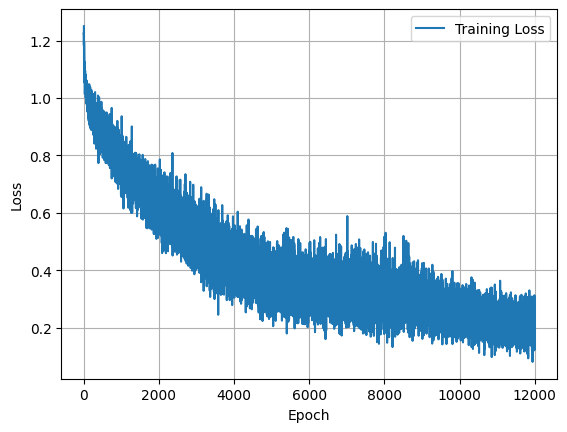

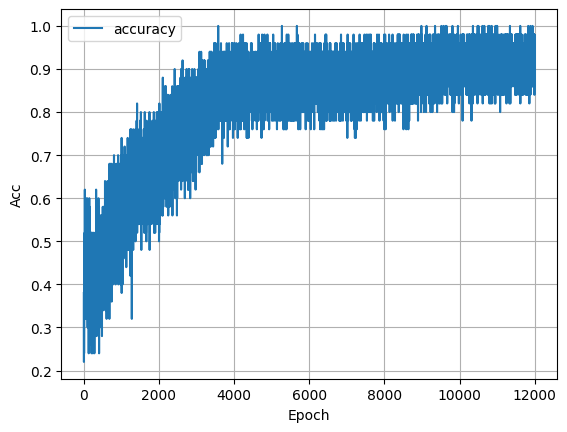

In [ ]:
# Plotting loss values
plt.figure()
plt.plot(loss_values, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.plot(acc_values, label="accuracy")
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend()
plt.grid()
plt.show()

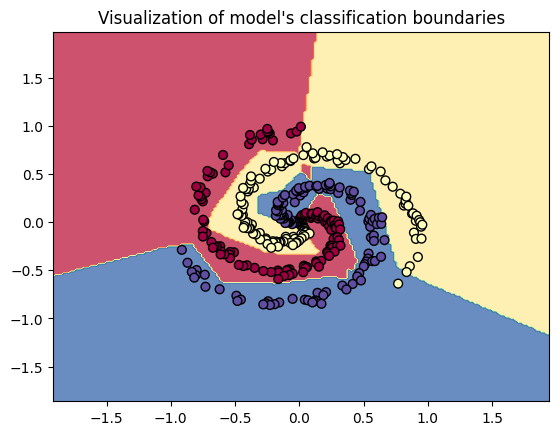

In [ ]:
def dummy_function(x):
    if isinstance(x, np.ndarray):
        x = torch.tensor(x, dtype=torch.float32)
    return F.softmax(model(x), dim=1).detach().numpy()

fig, ax = data.visualize_model(dummy_function, entropy=False);